#### Here we create the model by using the VGG16 transfer learning technique.

In [32]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
batch_size = 32
img_height = 224
img_width = 224

In [3]:
import os 

In [4]:
os.listdir()

['VGG16_from_pretrain.ipynb', 'VGG16_from_scratch.ipynb']

In [5]:
os.chdir("../")

In [6]:
os.getcwd()

'c:\\Users\\dhruv\\Documents\\DA-IICT\\sem-1\\FOML\\DAIICT_FOML_Project\\Alzheimers_Disease_Detection'

In [31]:
#### collect the data from the local disk

In [9]:
trainDataGen = ImageDataGenerator(
    rescale= 1./255,
    zoom_range= 0.2,
    horizontal_flip= True,
    validation_split= 0.2  
)

validationDataGen = ImageDataGenerator(
    rescale= 1./255,
    validation_split=0.2
)

testDataGen = ImageDataGenerator(
    rescale= 1./255 
)

print("geting the train data")

trainData = trainDataGen.flow_from_directory(
    "Data",
    subset="training",
    class_mode="categorical",
    target_size=(224,224)
)

print("geting the Test_Data")

testData = testDataGen.flow_from_directory(
    "Test_Data",
    class_mode="categorical",
    target_size=(224,224)
)

print("geting the validation data")

validData = validationDataGen.flow_from_directory(
    "Data",
    subset="validation",
    class_mode="categorical",
    target_size=(224,224)
)

print("Data collected successfully")

geting the train data
Found 1581 images belonging to 4 classes.
geting the Test_Data
Found 410 images belonging to 4 classes.
geting the validation data
Found 395 images belonging to 4 classes.
Data collected successfully


In [21]:
# directory = r"C:\Users\dhruv\Documents\DAIICT_ML_Project\Alzheimers_Disease_Detection\Data"

# train_df = keras.utils.image_dataset_from_directory(
#     directory,
#     labels="inferred",
#     label_mode = "int",
#     batch_size=32,
#     image_size=(224,224),
#     validation_split = 0.2,
#     seed = 42,
#     subset="training"
# )

# valid_df = keras.utils.image_dataset_from_directory(
#     directory,
#     labels="inferred",
#     label_mode = "int",
#     batch_size=32,
#     image_size=(224,224),
#     validation_split = 0.2,
#     seed = 42,
#     subset="validation"
# )

In [11]:
trainData

In [12]:
trainData.classes

array([0, 0, 0, ..., 3, 3, 3])

#### Classes 

In [14]:
trainData.class_indices

{'Mild Dementia': 0,
 'Moderate Dementia': 1,
 'Non Demented': 2,
 'Very mild Dementia': 3}

In [18]:
num_class  = trainData.num_classes

#### Loading the VGG16 model and do the transfer learning

In [19]:
from keras.applications.vgg16 import VGG16

In [21]:
vgg16 = VGG16(weights='imagenet', input_shape=(224,224,3), classes=num_class, include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

In [22]:
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_class, activation='softmax')(x)

In [23]:
model = Model(inputs=vgg16.input, outputs=predictions)

In [24]:
optimizer='adam'
loss='categorical_crossentropy'

In [25]:
model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

#### Model architecture

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
from keras.callbacks import EarlyStopping

#### Model traning 

In [40]:
history = model.fit(
    trainData,
    epochs=10,
    validation_data=validData,
    validation_steps=10,
    callbacks=[keras.callbacks.EarlyStopping(patience=2)]
)

Epoch 1/10
50/50 [==============================] - 223s 4s/step - loss: 0.9995 - accuracy: 0.5636 - val_loss: 1.1467 - val_accuracy: 0.4375
Epoch 2/10
50/50 [==============================] - 226s 5s/step - loss: 0.8367 - accuracy: 0.6439 - val_loss: 1.0354 - val_accuracy: 0.6219
Epoch 3/10
50/50 [==============================] - 232s 5s/step - loss: 0.6834 - accuracy: 0.7135 - val_loss: 0.8062 - val_accuracy: 0.7656
Epoch 4/10
50/50 [==============================] - 256s 5s/step - loss: 0.5713 - accuracy: 0.7634 - val_loss: 0.5394 - val_accuracy: 0.9438
Epoch 5/10
50/50 [==============================] - 276s 6s/step - loss: 0.4904 - accuracy: 0.7995 - val_loss: 0.4121 - val_accuracy: 0.9312
Epoch 6/10
50/50 [==============================] - 270s 5s/step - loss: 0.4903 - accuracy: 0.7862 - val_loss: 0.3397 - val_accuracy: 0.9438
Epoch 7/10
50/50 [==============================] - 246s 5s/step - loss: 0.4221 - accuracy: 0.8286 - val_loss: 0.2826 - val_accuracy: 0.9719
Epoch 8/10
50

In [41]:
history.history

{'loss': [0.999456524848938,
  0.8366994857788086,
  0.6833807229995728,
  0.5713444352149963,
  0.49042150378227234,
  0.4902617931365967,
  0.42208951711654663,
  0.3594236373901367,
  0.35415515303611755,
  0.3598693907260895],
 'accuracy': [0.5635673403739929,
  0.6438962817192078,
  0.7134724855422974,
  0.7634408473968506,
  0.7994939684867859,
  0.7862112522125244,
  0.8285894989967346,
  0.8519924283027649,
  0.8500948548316956,
  0.8500948548316956],
 'val_loss': [1.1467430591583252,
  1.035407304763794,
  0.806230902671814,
  0.5393668413162231,
  0.41206270456314087,
  0.3397066593170166,
  0.2826475203037262,
  0.22524133324623108,
  0.1912660449743271,
  0.17514950037002563],
 'val_accuracy': [0.4375,
  0.621874988079071,
  0.765625,
  0.9437500238418579,
  0.9312499761581421,
  0.9437500238418579,
  0.971875011920929,
  0.9906250238418579,
  0.981249988079071,
  0.9750000238418579]}

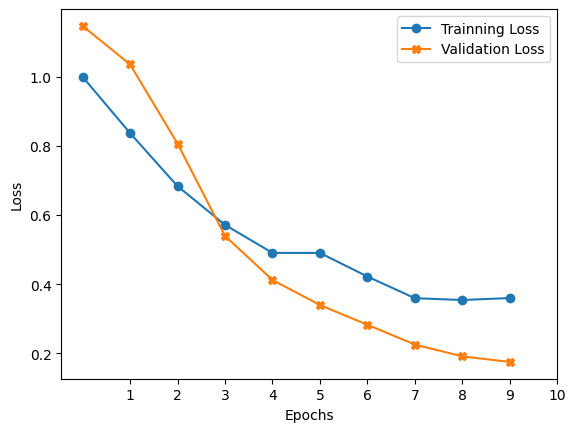

In [60]:
plt.plot(history.history["loss"], marker="o", label="Trainning Loss")
plt.plot(history.history["val_loss"], marker="X", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(list(range(1,11,1)))
plt.legend(loc="upper right")
plt.show()

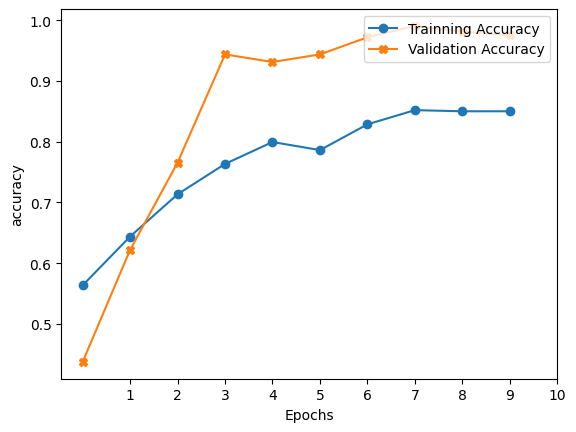

In [63]:
plt.plot(history.history["accuracy"], marker="o", label="Trainning Accuracy")
plt.plot(history.history["val_accuracy"], marker="X", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.xticks(list(range(1,11,1)))
plt.legend(loc="upper right")
plt.show()

#### Model evaluation

In [64]:
results = model.evaluate(testData, batch_size=128)
print("test loss, test acc:", results)

13/13 [==============================] - 55s 4s/step - loss: 1.6117 - accuracy: 0.4317
test loss, test acc: [1.6116735935211182, 0.43170732259750366]


In [65]:
test_loss, test_accuracy = results

In [66]:
test_loss

1.6116735935211182

In [67]:
test_accuracy

0.43170732259750366

In [73]:
y_true = testData.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [71]:
y_predicted = model.predict(testData)

13/13 [==============================] - 58s 5s/step


In [75]:
y_hat = np.argmax(y_predicted,axis=1)
y_hat

array([3, 0, 3, 0, 0, 3, 0, 1, 1, 0, 3, 0, 3, 3, 3, 1, 1, 0, 0, 2, 1, 3,
       1, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 2, 3, 0, 3, 0, 2, 3, 3, 3,
       1, 1, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 0, 3, 1,
       0, 1, 3, 1, 1, 3, 0, 3, 3, 2, 3, 1, 2, 0, 1, 2, 3, 1, 1, 3, 2, 0,
       3, 3, 3, 1, 2, 0, 2, 1, 1, 0, 1, 3, 1, 3, 0, 1, 3, 1, 1, 0, 3, 0,
       1, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0, 1, 1, 3, 0, 0, 0,
       1, 3, 2, 3, 3, 1, 2, 3, 3, 1, 3, 1, 0, 3, 1, 3, 1, 3, 1, 2, 3, 3,
       3, 1, 0, 1, 0, 0, 1, 0, 1, 1, 3, 3, 3, 1, 1, 2, 2, 1, 0, 0, 3, 1,
       2, 0, 3, 0, 1, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 3,
       0, 3, 2, 0, 0, 1, 1, 1, 3, 3, 1, 1, 0, 3, 2, 0, 3, 1, 0, 3, 1, 2,
       2, 3, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 0, 3, 0, 1, 3, 2, 0, 0, 2, 1,
       2, 2, 1, 1, 0, 0, 2, 1, 3, 1, 3, 1, 1, 0, 1, 3, 2, 3, 1, 3, 0, 1,
       3, 3, 3, 2, 2, 2, 3, 0, 3, 2, 3, 0, 0, 1, 2, 3, 1, 3, 2, 3, 3, 1,
       0, 3, 2, 3, 1, 1, 3, 1, 3, 2, 0, 1, 1, 3, 0,

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
acc = accuracy_score(y_true, y_hat,)
print("the accuracy score is : ", acc)

the accuracy score is :  0.2804878048780488


In [78]:
confusion_matrix(y_true,y_hat)

array([[33, 32, 10, 53],
       [ 3,  2,  2,  6],
       [18, 27,  7, 23],
       [34, 53, 34, 73]], dtype=int64)

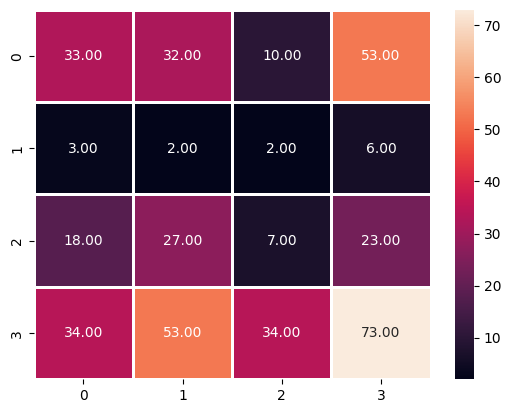

In [84]:
sns.heatmap(confusion_matrix(y_true,y_hat), annot=True, fmt=".2f",linewidths=2)
plt.show()

#### Save the model in local.

In [70]:
model.save("Model/vgg16_pretrain_model_epochs_10.h5",overwrite=True)